In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine import imputation as mdi
import scipy.stats as stats
import feature_engine
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [2]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [3]:
df_train = pd.read_csv('D:/Learning/train.csv')

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


C:\Users\suyog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


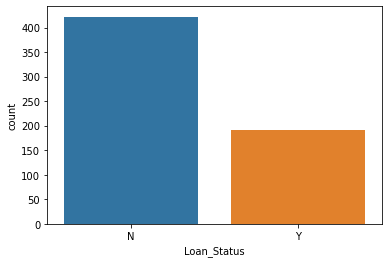

In [5]:
g = sns.countplot(df_train['Loan_Status'])
g.set_xticklabels(['N','Y'])
plt.show()

In [6]:
df_train.drop(['CoapplicantIncome'],axis=1,inplace=True)

In [7]:
df_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

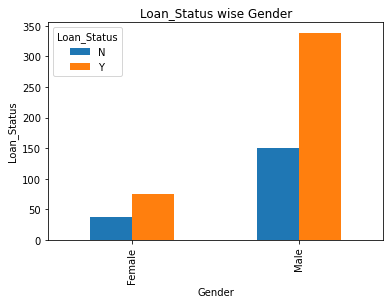

In [10]:
pd.crosstab(df_train['Gender'],df_train['Loan_Status']).plot(kind='bar')
plt.title('Loan_Status wise Gender')
plt.xlabel('Gender')
plt.ylabel('Loan_Status')
plt.show()

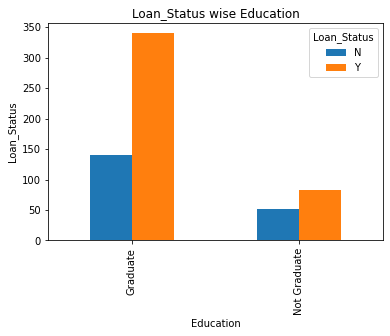

In [11]:
pd.crosstab(df_train['Education'],df_train['Loan_Status']).plot(kind='bar')
plt.title('Loan_Status wise Education')
plt.xlabel('Education')
plt.ylabel('Loan_Status')
plt.show()

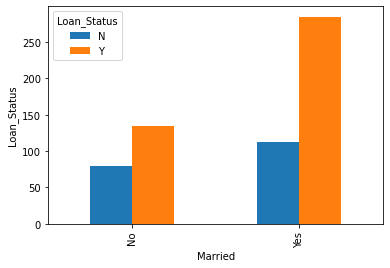

In [12]:
pd.crosstab(df_train['Married'],df_train['Loan_Status']).plot(kind='bar')
plt.xlabel('Married')
plt.ylabel('Loan_Status')
plt.show()

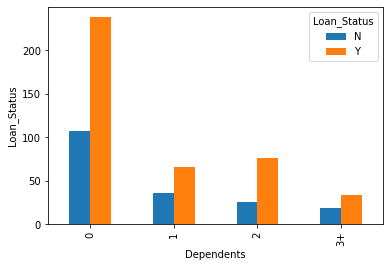

In [13]:
pd.crosstab(df_train['Dependents'],df_train['Loan_Status']).plot(kind='bar')
plt.xlabel('Dependents')
plt.ylabel('Loan_Status')
plt.show()

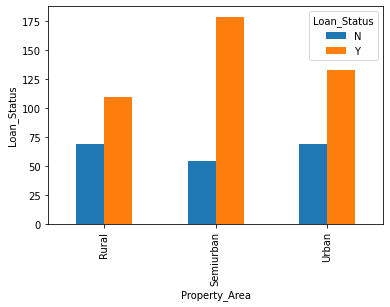

In [14]:
pd.crosstab(df_train['Property_Area'],df_train['Loan_Status']).plot(kind='bar')
plt.xlabel('Property_Area')
plt.ylabel('Loan_Status')
plt.show()

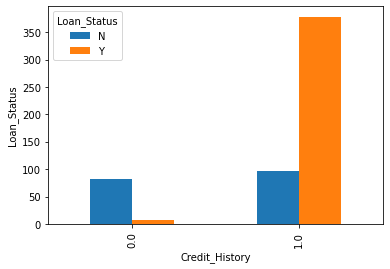

In [15]:
pd.crosstab(df_train['Credit_History'],df_train['Loan_Status']).plot(kind='bar')
plt.xlabel('Credit_History')
plt.ylabel('Loan_Status')
plt.show()

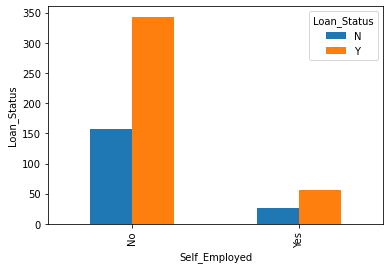

In [16]:
pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status']).plot(kind='bar')
plt.xlabel('Self_Employed')
plt.ylabel('Loan_Status')
plt.show()

In [17]:
df_train.drop('Loan_ID',axis=1,inplace=True)

In [18]:
df_train.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#CategoryGroupLists=df_train.groupby('Loan_Status')['ApplicantIncome'].apply(list)
 
#AnovaResults = f_oneway(*CategoryGroupLists)
#print('P-Value for Anova is: ', AnovaResults[1])

In [20]:
#CategoryGroupLists=df_train.groupby('Loan_Status')['LoanAmount'].apply(list)
 
#AnovaResults = f_oneway(*CategoryGroupLists)
#print('P-Value for Anova is: ', AnovaResults[1])

In [21]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y


In [22]:
print(df_train.var())

ApplicantIncome     3.732039e+07
LoanAmount          7.325190e+03
Loan_Amount_Term    4.240668e+03
Credit_History      1.331362e-01
dtype: float64


C:\Users\suyog\AppData\Local\Temp/ipykernel_18988/3635896707.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.var())


In [23]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df_train.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df_train['LoanAmount_CCa'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mode().iloc[0])
df_train['Loan_Amount_Term_CCa'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode().iloc[0])
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode().iloc[0])

In [26]:
df_train_cca = df_train.fillna(df_train.mode().iloc[0])

In [27]:
df_train.var()

C:\Users\suyog\AppData\Local\Temp/ipykernel_18988/3907004805.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.var()


ApplicantIncome         3.732039e+07
LoanAmount              7.325190e+03
Loan_Amount_Term        4.240668e+03
Credit_History          1.331362e-01
LoanAmount_CCa          7.086435e+03
Loan_Amount_Term_CCa    4.151048e+03
dtype: float64

In [28]:
def categorical_distribution(df,df_cca,variable):
    tmp = pd.concat([df[variable].value_counts()/len(df),
                    df_cca[variable].value_counts()/len(df_cca)],axis=1)
    tmp.columns = ['original','cca']
    return tmp

In [29]:
categorical_distribution(df_train,df_train_cca,'Gender')

,original,cca
Male,0.81759,0.81759
Female,0.18241,0.18241


In [30]:
categorical_distribution(df_train,df_train_cca,'Dependents')

,original,cca
0,0.561889,0.586319
1,0.166124,0.166124
2,0.164495,0.164495
3+,0.083062,0.083062


In [31]:
categorical_distribution(df_train,df_train_cca,'Self_Employed')

,original,cca
No,0.814332,0.86645
Yes,0.133550,0.13355


In [32]:
categorical_distribution(df_train,df_train_cca,'Credit_History')

,original,cca
1.0,0.773616,0.855049
0.0,0.144951,0.144951


<AxesSubplot:ylabel='Density'>

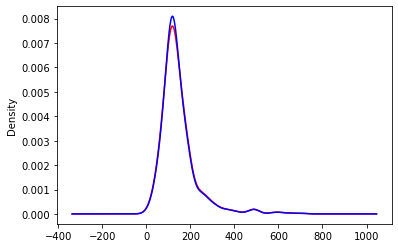

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['LoanAmount'].plot.density(color='red')
df_train_cca['LoanAmount'].plot.density(color='blue')

<AxesSubplot:ylabel='Density'>

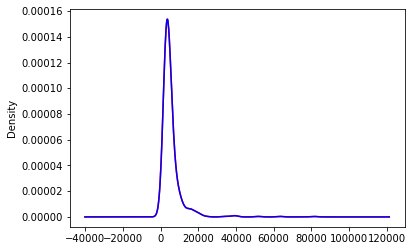

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['ApplicantIncome'].plot.density(color='red')
df_train_cca['ApplicantIncome'].plot.density(color='blue')

<AxesSubplot:ylabel='Density'>

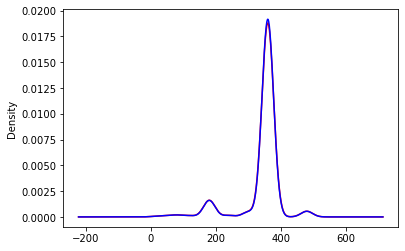

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['Loan_Amount_Term'].plot.density(color='red')
df_train_cca['Loan_Amount_Term'].plot.density(color='blue')

In [36]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()

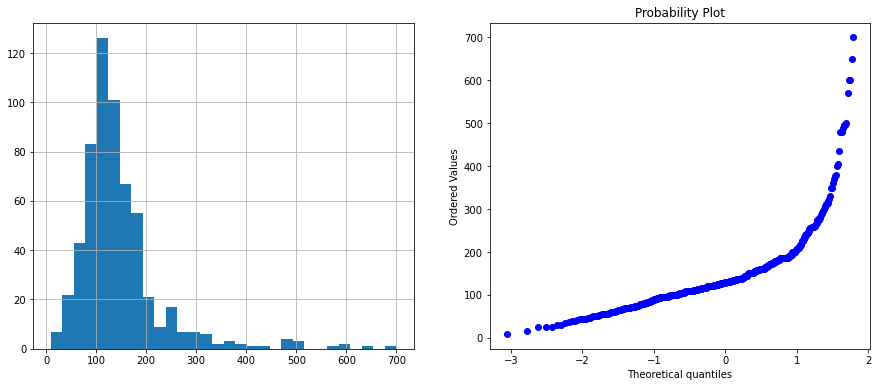

In [37]:
diagnostic_plots(df_train,'LoanAmount')

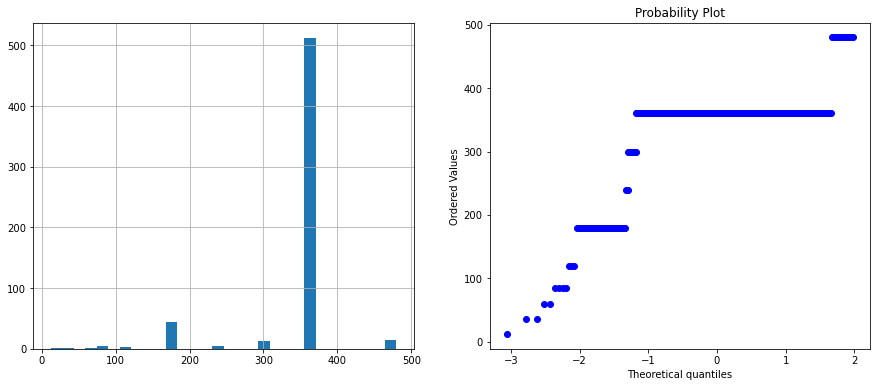

In [38]:
diagnostic_plots(df_train,'Loan_Amount_Term')

In [39]:
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].astype('category')

In [40]:
categorical_distribution(df_train,df_train_cca,'Loan_Amount_Term')

,original,cca
12.0,0.001629,0.001629
36.0,0.003257,0.003257
60.0,0.003257,0.003257
84.0,0.006515,0.006515
120.0,0.004886,0.004886
180.0,0.071661,0.071661
240.0,0.006515,0.006515
300.0,0.021173,0.021173
360.0,0.833876,0.856678
480.0,0.024430,0.024430


In [41]:
df_train['LoanAmount'] =  df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())



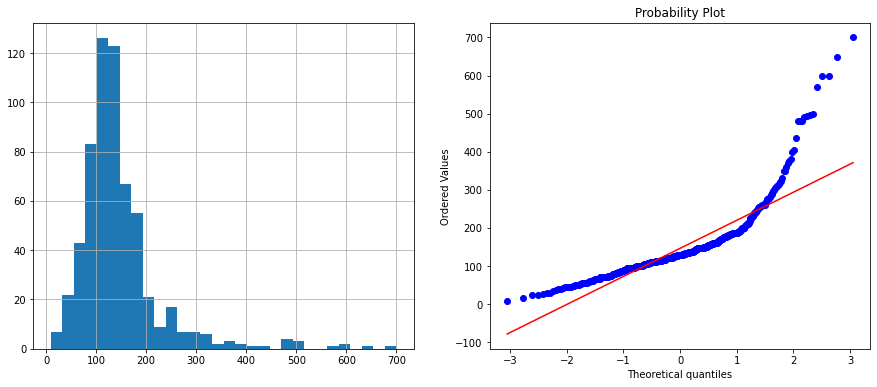

In [42]:
diagnostic_plots(df_train,'LoanAmount')

In [43]:
df_train['Credit_History'] = df_train['Credit_History'].apply(str)

In [44]:
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import AddMissingIndicator
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import EndTailImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.transformation import ReciprocalTransformer

In [45]:
X_train,X_test,y_train,y_test = train_test_split(df_train.drop('Loan_Status',axis=1),df_train['Loan_Status'],test_size=0.25, stratify=df_train['Loan_Status'],random_state=42, shuffle=True)

In [46]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(5,6))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()

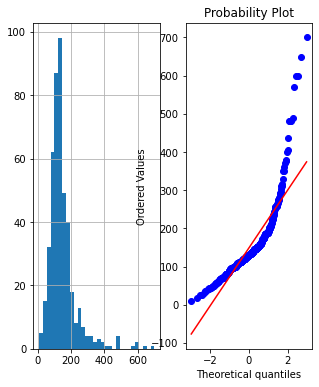

In [47]:
diagnostic_plots(X_train,'LoanAmount')

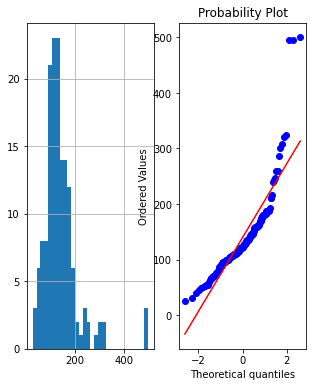

In [48]:
diagnostic_plots(X_test,'LoanAmount')

In [49]:
X_train['LoanAmount']=(X_train['LoanAmount']-X_train['LoanAmount'].min())/(X_train['LoanAmount'].max()-X_train['LoanAmount'].min())

In [50]:
X_test['LoanAmount']=(X_test['LoanAmount']-X_test['LoanAmount'].min())/(X_test['LoanAmount'].max()-X_test['LoanAmount'].min())

In [51]:
X_train['ApplicantIncome']=(X_train['ApplicantIncome']-X_train['ApplicantIncome'].min())/(X_train['ApplicantIncome'].max()-X_train['ApplicantIncome'].min())

In [52]:
X_test['ApplicantIncome']=(X_test['ApplicantIncome']-X_test['ApplicantIncome'].min())/(X_test['ApplicantIncome'].max()-X_test['ApplicantIncome'].min())

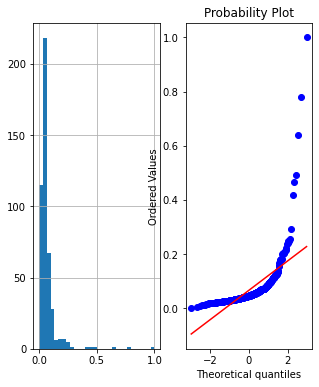

In [53]:
diagnostic_plots(X_train,'ApplicantIncome')

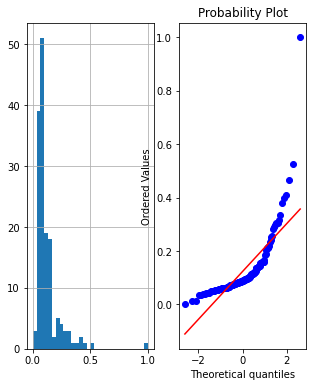

In [54]:
diagnostic_plots(X_test,'ApplicantIncome')

In [55]:
y_train.value_counts()

Y    316
N    144
Name: Loan_Status, dtype: int64

In [56]:
y_test.value_counts()

Y    106
N     48
Name: Loan_Status, dtype: int64

In [57]:
X_train2 = X_train
y_train2 = y_train

In [58]:
pipe = Pipeline([
    ('missing_ind',AddMissingIndicator()),
    ('imputer_mode',CategoricalImputer(imputation_method='frequent', variables=['Loan_Amount_Term','Gender','Married','Dependents','Self_Employed','Credit_History'])),
    ('imputer_mean',MeanMedianImputer(imputation_method='mean',variables=['LoanAmount']))
])

In [59]:
pipe.fit(X_train)

Pipeline(steps=[('missing_ind', AddMissingIndicator()),
                ('imputer_mode',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Loan_Amount_Term', 'Gender',
                                               'Married', 'Dependents',
                                               'Self_Employed',
                                               'Credit_History'])),
                ('imputer_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['LoanAmount']))])

In [60]:
tmp = pipe.transform(X_train)

<AxesSubplot:ylabel='Density'>

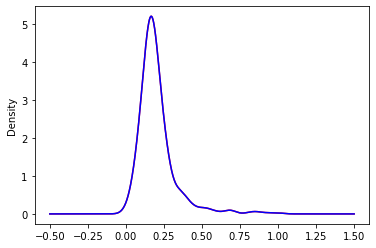

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LoanAmount'].plot.density(color='red')
tmp['LoanAmount'].plot.density(color='blue')

In [62]:
categorical_distribution(X_train2,tmp,'Gender')

,original,cca
Male,0.821739,0.821739
Female,0.178261,0.178261


In [63]:
categorical_distribution(X_train2,tmp,'Self_Employed')

,original,cca
No,0.815217,0.867391
Yes,0.132609,0.132609


In [64]:
tmp.groupby('Self_Employed').size()

Self_Employed
No     399
Yes     61
dtype: int64

In [65]:
X_train2.groupby('Self_Employed').size()

Self_Employed
No     375
Yes     61
dtype: int64

In [66]:
X_train2['Self_Employed'].count()

436

In [67]:
categorical_distribution(X_train,tmp,'Credit_History')

,original,cca
1.0,0.776087,0.776087
0.0,0.132609,0.132609
nan,0.091304,0.091304


In [68]:
tmp.isnull().mean()

Gender                  0.0
Married                 0.0
Dependents              0.0
Education               0.0
Self_Employed           0.0
ApplicantIncome         0.0
LoanAmount              0.0
Loan_Amount_Term        0.0
Credit_History          0.0
Property_Area           0.0
LoanAmount_CCa          0.0
Loan_Amount_Term_CCa    0.0
Married_na              0.0
Dependents_na           0.0
Self_Employed_na        0.0
Loan_Amount_Term_na     0.0
dtype: float64

In [69]:
tmp.dtypes

Gender                    object
Married                   object
Dependents                object
Education                 object
Self_Employed             object
ApplicantIncome          float64
LoanAmount               float64
Loan_Amount_Term        category
Credit_History            object
Property_Area             object
LoanAmount_CCa           float64
Loan_Amount_Term_CCa     float64
Married_na                 int32
Dependents_na              int32
Self_Employed_na           int32
Loan_Amount_Term_na        int32
dtype: object

In [70]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(5,6))
    plt.subplot(1,2,1)
    df[variable].hist(bins=30)
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()

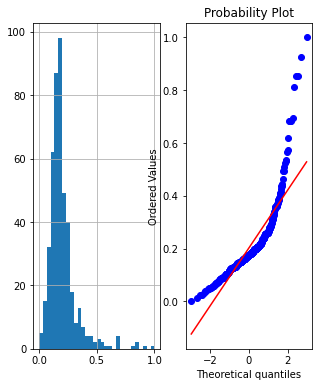

In [71]:
diagnostic_plots(tmp,'LoanAmount')

In [72]:
from  feature_engine.transformation import YeoJohnsonTransformer
from  feature_engine.transformation import PowerTransformer
from  feature_engine.transformation import BoxCoxTransformer

In [73]:
pipe = Pipeline([
    ('YeoJohnsonTransformation',YeoJohnsonTransformer(variables=['LoanAmount','ApplicantIncome']))
])

In [74]:
pipe.fit(tmp)

Pipeline(steps=[('YeoJohnsonTransformation',
                 YeoJohnsonTransformer(variables=['LoanAmount',
                                                  'ApplicantIncome']))])

In [75]:
data_tf = pipe.transform(tmp)

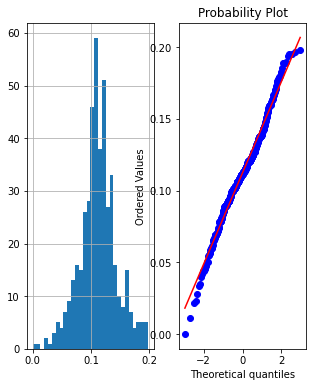

In [76]:
diagnostic_plots(data_tf,'LoanAmount')

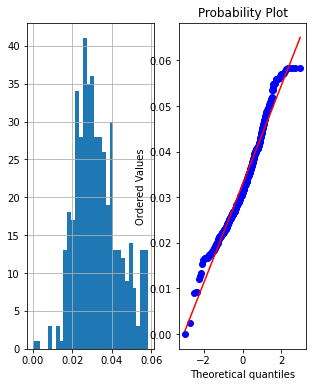

In [77]:
diagnostic_plots(data_tf,'ApplicantIncome')

In [78]:
#diagnostic_plots(data_tf,'CoapplicantIncome')

<AxesSubplot:ylabel='Density'>

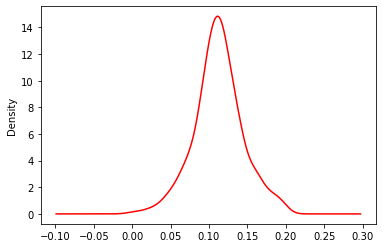

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
data_tf['LoanAmount'].plot.density(color='red')

<AxesSubplot:ylabel='Density'>

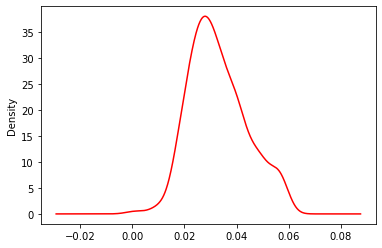

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
data_tf['ApplicantIncome'].plot.density(color='red')

In [81]:
X_train = data_tf

In [82]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_CCa,Loan_Amount_Term_CCa
194,Male,No,0,Graduate,No,0.103623,0.200000,360.0,1.0,Rural,120.0,360.0
428,Male,Yes,0,Graduate,No,0.071031,0.130526,360.0,1.0,Rural,87.0,360.0
444,Male,Yes,0,Graduate,No,0.184194,0.315789,300.0,nan,Rural,175.0,300.0
34,Male,No,3+,Graduate,No,0.316691,0.621053,360.0,1.0,Rural,320.0,360.0
164,Male,Yes,0,Graduate,No,0.235223,0.105263,180.0,1.0,Urban,75.0,180.0


In [83]:
pipe = Pipeline([
    ('missing_ind',AddMissingIndicator()),
    ('imputer_mode',CategoricalImputer(imputation_method='frequent', variables=['Loan_Amount_Term','Gender','Married','Dependents','Self_Employed','Credit_History'])),
    ('imputer_mean',MeanMedianImputer(imputation_method='mean',variables=['LoanAmount']))
])
pipe.fit(X_test)
tmp2 = pipe.transform(X_test)
pipe = Pipeline([
   ('YeoJohnsonTransformer',YeoJohnsonTransformer(variables=['LoanAmount','ApplicantIncome']))
])
pipe.fit(tmp2)
data_test = pipe.transform(tmp2)

In [84]:
X_test = data_test

<AxesSubplot:ylabel='Density'>

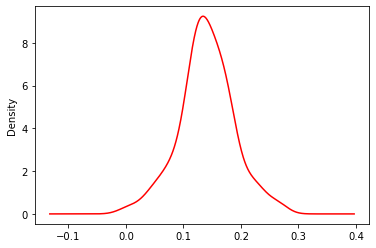

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
data_test['LoanAmount'].plot.density(color='red')

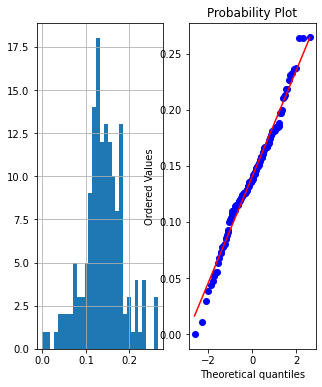

In [86]:
diagnostic_plots(data_test,'LoanAmount')


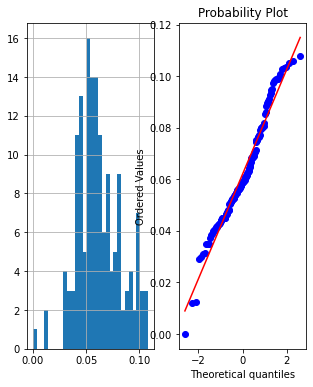

In [87]:
diagnostic_plots(data_test,'ApplicantIncome')

In [88]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_CCa,Loan_Amount_Term_CCa,Married_na,Dependents_na,Self_Employed_na,Loan_Amount_Term_na
194,Male,No,0,Graduate,No,0.064707,0.135568,360.0,1.0,Rural,120.0,360.0,0,0,0,0
428,Male,Yes,0,Graduate,No,0.050819,0.100150,360.0,1.0,Rural,87.0,360.0,0,0,0,0
444,Male,Yes,0,Graduate,No,0.085530,0.177845,300.0,nan,Rural,175.0,300.0,0,0,0,0
34,Male,No,3+,Graduate,No,0.099706,0.236013,360.0,1.0,Rural,320.0,360.0,0,0,0,0
164,Male,Yes,0,Graduate,No,0.092856,0.084720,180.0,1.0,Urban,75.0,180.0,0,0,0,0


In [89]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
X_train['Gender']= label_encoder.fit_transform(X_train['Gender'])
X_train['Married']= label_encoder.fit_transform(X_train['Married'])
X_train['Education']= label_encoder.fit_transform(X_train['Education'])
X_train['Credit_History']= label_encoder.fit_transform(X_train['Credit_History'])
X_train['Property_Area']= label_encoder.fit_transform(X_train['Property_Area'])
X_train['Self_Employed']= label_encoder.fit_transform(X_train['Self_Employed'])
X_train['Dependents']=label_encoder.fit_transform(X_train['Dependents'])

In [90]:
X_test['Gender']= label_encoder.fit_transform(X_test['Gender'])
X_test['Married']= label_encoder.fit_transform(X_test['Married'])
X_test['Education']= label_encoder.fit_transform(X_test['Education'])
X_test['Credit_History']= label_encoder.fit_transform(X_test['Credit_History'])
X_test['Property_Area']= label_encoder.fit_transform(X_test['Property_Area'])
X_test['Self_Employed']= label_encoder.fit_transform(X_test['Self_Employed'])
X_test['Dependents']=label_encoder.fit_transform(X_test['Dependents'])

In [91]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_CCa,Loan_Amount_Term_CCa,Married_na,Dependents_na,Self_Employed_na,Loan_Amount_Term_na
194,1,0,0,0,0,0.064707,0.135568,360.0,1,0,120.0,360.0,0,0,0,0
428,1,1,0,0,0,0.050819,0.100150,360.0,1,0,87.0,360.0,0,0,0,0
444,1,1,0,0,0,0.085530,0.177845,300.0,2,0,175.0,300.0,0,0,0,0
34,1,0,3,0,0,0.099706,0.236013,360.0,1,0,320.0,360.0,0,0,0,0
164,1,1,0,0,0,0.092856,0.084720,180.0,1,2,75.0,180.0,0,0,0,0


In [92]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_CCa,Loan_Amount_Term_CCa,Married_na,Dependents_na,Self_Employed_na,Loan_Amount_Term_na
1,1,1,1,0,0,0.034708,0.110605,360.0,1,0,128.0,360.0,0,0,0,0
394,1,1,2,0,0,0.026402,0.101583,360.0,1,2,113.0,360.0,0,0,0,0
316,1,1,2,0,0,0.030181,0.105916,360.0,1,1,120.0,360.0,0,0,0,0
62,1,1,0,1,1,0.023012,0.129111,180.0,0,0,165.0,180.0,0,0,0,0
158,1,0,0,0,0,0.025607,0.105916,360.0,1,0,120.0,360.0,0,0,1,0


In [93]:
y_train.head()

1      N
394    Y
316    Y
62     N
158    Y
Name: Loan_Status, dtype: object

In [94]:
X_test['Married_na'] = 0

In [95]:
smote = SMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        n_jobs=4,
)

In [96]:
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=4)


smenn = SMOTEENN(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    smote=smote,
    enn=enn,
    n_jobs=4
)

In [97]:
tl = TomekLinks(
    sampling_strategy='all',
    n_jobs=4)

smtomek = SMOTETomek(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    smote=smote,
    tomek=tl,
    n_jobs=4
)

In [98]:

adasyn = ADASYN(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        n_neighbors=3,
        n_jobs=4,
)

In [99]:
ncr = NeighbourhoodCleaningRule(
    sampling_strategy='all',# undersamples all classes
    n_neighbors=3, 
    kind_sel='mode', 
    threshold_cleaning=0.1, # the threshold to evaluate a class for cleaning (used only for clearning step)
) 

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

In [101]:
model = make_pipeline(
    MinMaxScaler(),
    smtomek,
   # ncr, 
    RandomForestClassifier(
            n_estimators=1000, random_state=42, max_depth=4,bootstrap=True, n_jobs=4
        ),
)

In [102]:
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('smotetomek',
                 SMOTETomek(n_jobs=4, random_state=0,
                            smote=SMOTE(n_jobs=4, random_state=0),
                            tomek=TomekLinks(n_jobs=4,
                                             sampling_strategy='all'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=1000,
                                        n_jobs=4, random_state=42))])

In [103]:
pred_train = model.predict_proba(X_train)[:,1]
pred_test = model.predict_proba(X_test)[:,1]

In [104]:
print('Train roc-auc: {}'.format(roc_auc_score(y_train, pred_train)))

Train roc-auc: 0.886229781997187


In [105]:
print('Test roc-auc: {}'.format(roc_auc_score(y_test, pred_test)))

Test roc-auc: 0.8132861635220127


In [106]:
y_pred = model.predict(X_test)

<AxesSubplot:>

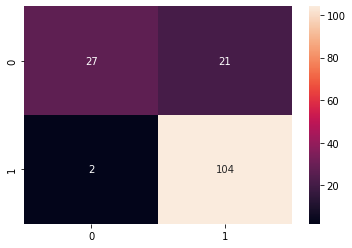

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.93      0.56      0.70        48
           Y       0.83      0.98      0.90       106

    accuracy                           0.85       154
   macro avg       0.88      0.77      0.80       154
weighted avg       0.86      0.85      0.84       154



In [109]:
y_test

194    Y
428    Y
444    Y
34     N
164    Y
      ..
335    Y
176    Y
574    N
180    N
557    Y
Name: Loan_Status, Length: 154, dtype: object

In [110]:
test = pd.read_csv('D:/Learning/test.csv')

In [111]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [112]:
test.drop('CoapplicantIncome',axis=1,inplace=True)

In [113]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [114]:
test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [115]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [116]:
test['Education'].value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [117]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [118]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [119]:
test['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [120]:
test3 = test

In [121]:
test = test.drop('Loan_ID',axis=1)

In [122]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('category')

In [123]:
test['Credit_History'] = test['Credit_History'].apply(str)

In [124]:
test['LoanAmount']=(test['LoanAmount']-test['LoanAmount'].min())/(test['LoanAmount'].max()-test['LoanAmount'].min())

In [125]:
test['ApplicantIncome']=(test['ApplicantIncome']-test['ApplicantIncome'].min())/(test['ApplicantIncome'].max()-test['ApplicantIncome'].min())

In [126]:
pipe = Pipeline([
    ('missing_ind',AddMissingIndicator()),
    ('imputer_mode',CategoricalImputer(imputation_method='frequent', variables=['Loan_Amount_Term','Gender','Married','Dependents','Self_Employed','Credit_History'])),
    ('imputer_mean',MeanMedianImputer(imputation_method='mean',variables=['LoanAmount']))
])
pipe.fit(test)
tmp3 = pipe.transform(test)
pipe = Pipeline([
   ('YeoJohnsonTransformer',YeoJohnsonTransformer(variables=['LoanAmount','ApplicantIncome']))
])
pipe.fit(tmp3)
test = pipe.transform(tmp3)

In [127]:
test['Gender']= label_encoder.fit_transform(test['Gender'])
test['Married']= label_encoder.fit_transform(test['Married'])
test['Education']= label_encoder.fit_transform(test['Education'])
test['Credit_History']= label_encoder.fit_transform(test['Credit_History'])
test['Property_Area']= label_encoder.fit_transform(test['Property_Area'])
test['Self_Employed']= label_encoder.fit_transform(test['Self_Employed'])
test['Dependents']=label_encoder.fit_transform(test['Dependents'])

In [128]:
test['Married_na'] = 0

In [129]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_na,Dependents_na,Self_Employed_na,LoanAmount_na,Loan_Amount_Term_na,Married_na
0,1,1,0,0,0,0.043634,0.115048,360.0,1,2,0,0,0,0,0,0
1,1,1,1,0,0,0.030213,0.130288,360.0,1,2,0,0,0,0,0,0
2,1,1,2,0,0,0.040726,0.186770,360.0,1,2,0,0,0,0,0,0
3,1,1,2,0,0,0.024811,0.104584,360.0,2,2,0,0,0,0,0,0
4,1,0,0,1,0,0.031530,0.078624,360.0,1,2,0,0,0,0,0,0


In [130]:
test_predictions = model.predict(test)

C:\Users\suyog\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Gender_na
- LoanAmount_na
Feature names seen at fit time, yet now missing:
- LoanAmount_CCa
- Loan_Amount_Term_CCa

  warnings.warn(message, FutureWarning)


In [131]:
test_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [132]:
test3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,78.0,360.0,1.0,Urban


In [133]:
Loan_ID = test3['Loan_ID']

In [134]:
submission_df_1 = pd.DataFrame({
                  "Loan_ID": Loan_ID, 
                  "Loan_Status": test_predictions})

In [135]:
submission_df_1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [136]:
submission_df_1.to_csv('D:/Learning/Loan_Predictions.csv', index=False)